In [1]:
### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()
# Country Data COUNTRY table
COUNTRY_df = pd.read_sql_query("select * from COUNTRY;", conn)
# League data from LEAGUE
LEAGUE_df = pd.read_sql_query("select * from LEAGUE;", conn)
#
Team_df = pd.read_sql_query("select * from TEAM;", conn)
# Match data from Matches - just pulling 1 year for now -2015/2016 might be latest year
# You can remove restriction if you want
#MATCH_df = pd.read_sql_query("select * from MATCH where SEASON = '2015/2016';", conn)
# Match data from Matches - just pulling 1 and relevant data for now - we can remove restriction later if we want
MATCH_df = pd.read_sql_query("SELECT DATE, LEAGUE_ID, HOME_TEAM_API_ID, AWAY_TEAM_API_ID, HOME_TEAM_GOAL, AWAY_TEAM_GOAL FROM MATCH WHERE SEASON = '2015/2016' ;",
conn)

### We calculate the "differential" for both the home team and away team

In [2]:
# FIND MOST DOMINATE BY 

MATCH_df["HOME_DIFF"] = MATCH_df["home_team_goal"]- MATCH_df["away_team_goal"]
MATCH_df["AWAY_DIFF"] = MATCH_df["away_team_goal"]- MATCH_df["home_team_goal"]

MATCH_home_df=MATCH_df.loc[:,["date","home_team_api_id", "HOME_DIFF","league_id","away_team_api_id"]]
MATCH_away_df=MATCH_df.loc[:,["date","away_team_api_id", "AWAY_DIFF","league_id","home_team_api_id"]]

MATCH_away_df.head()
MATCH_home_df.head()



,date,home_team_api_id,HOME_DIFF,league_id,away_team_api_id
0,2015-07-24 00:00:00,9997,1,1,8342
1,2015-07-25 00:00:00,8571,1,1,9985
2,2015-07-25 00:00:00,9987,2,1,1773
3,2015-07-25 00:00:00,8573,2,1,8203
4,2015-07-25 00:00:00,10000,2,1,9994


In [3]:
MATCH_away_df.head()


,date,away_team_api_id,AWAY_DIFF,league_id,home_team_api_id
0,2015-07-24 00:00:00,8342,-1,1,9997
1,2015-07-25 00:00:00,9985,-1,1,8571
2,2015-07-25 00:00:00,1773,-2,1,9987
3,2015-07-25 00:00:00,8203,-2,1,8573
4,2015-07-25 00:00:00,9994,-2,1,10000


In [4]:
# MATCH_away_df['W'] = '0' 
# MATCH_away_df['L'] = '0' 
# MATCH_away_df['T'] = '0' 
# MATCH_home_df['W'] = '0' 
# MATCH_home_df['L'] = '0' 
# MATCH_home_df['T'] = '0' 


# MATCH_away_df.loc[MATCH_away_df.AWAY_DIFF >0, 'W'] = '1' 
# MATCH_away_df.loc[MATCH_away_df.AWAY_DIFF <0, 'L'] = '1' 
# MATCH_away_df.loc[MATCH_away_df.AWAY_DIFF ==0, 'T'] = '1' 

# MATCH_home_df.loc[MATCH_home_df.HOME_DIFF >0, 'W'] = '1' 
# MATCH_home_df.loc[MATCH_home_df.HOME_DIFF <0, 'L'] = '1' 
# MATCH_home_df.loc[MATCH_home_df.HOME_DIFF ==0, 'T'] = '1' 

# MATCH_away_df.head(5)

MATCH_away_df['W'] = 0 
MATCH_away_df['L'] = 0 
MATCH_away_df['T'] = 0 
MATCH_home_df['W'] = 0 
MATCH_home_df['L'] = 0 
MATCH_home_df['T'] = 0 


MATCH_away_df.loc[MATCH_away_df.AWAY_DIFF >0, 'W'] = 1 
MATCH_away_df.loc[MATCH_away_df.AWAY_DIFF <0, 'L'] = 1 
MATCH_away_df.loc[MATCH_away_df.AWAY_DIFF ==0, 'T'] = 1 

MATCH_home_df.loc[MATCH_home_df.HOME_DIFF >0, 'W'] = 1 
MATCH_home_df.loc[MATCH_home_df.HOME_DIFF <0, 'L'] = 1 
MATCH_home_df.loc[MATCH_home_df.HOME_DIFF ==0, 'T'] = 1 

MATCH_away_df.head(5)



,date,away_team_api_id,AWAY_DIFF,league_id,home_team_api_id,W,L,T
0,2015-07-24 00:00:00,8342,-1,1,9997,0,1,0
1,2015-07-25 00:00:00,9985,-1,1,8571,0,1,0
2,2015-07-25 00:00:00,1773,-2,1,9987,0,1,0
3,2015-07-25 00:00:00,8203,-2,1,8573,0,1,0
4,2015-07-25 00:00:00,9994,-2,1,10000,0,1,0


### We combine the home team data with the away team data to create 1 liast of games, with the differential

In [5]:
MATCH_home_df = MATCH_home_df.rename(columns={"home_team_api_id": "team_api_id","HOME_DIFF":"DIFF","away_team_api_id": "opponent" })
MATCH_away_df = MATCH_away_df.rename(columns={"away_team_api_id": "team_api_id","AWAY_DIFF":"DIFF","home_team_api_id": "opponent" })




frames = [MATCH_home_df, MATCH_away_df]
all_games_unsorted = pd.concat(frames)
all_games = all_games_unsorted.sort_values(by=["team_api_id","date"])
all_games.reset_index(inplace=True)
all_games.head() 

,index,date,team_api_id,DIFF,league_id,opponent,W,L,T
0,1995,2015-07-18 00:00:00,1601,-2,15722,8019,0,1,0
1,2084,2015-07-24 00:00:00,1601,2,15722,8028,1,0,0
2,2173,2015-08-03 00:00:00,1601,1,15722,8245,1,0,0
3,2188,2015-08-10 00:00:00,1601,0,15722,8033,0,0,1
4,2197,2015-08-16 00:00:00,1601,-1,15722,1957,0,1,0


### We want to figure out the what the differential was for the next game as well.  
### We will make a copy of the table, and add "ng_" as a suffix to the columns for "next game"

In [6]:
next_game_unsorted = all_games.copy()
next_game_unsorted = next_game_unsorted.rename(columns={"DIFF": "ng_DIFF",
                                      "team_api_id": "ng_team_api_id2",
                                      "league_id":   "ng_league_id",
                                      "date":   "ng_date",
                                      "W": "ng_W",
                                      "L": "ng_L",
                                      "T": "ng_T" })

next_game = next_game_unsorted.sort_values(by=["ng_team_api_id2","ng_date"])
next_game.head()

,index,ng_date,ng_team_api_id2,ng_DIFF,ng_league_id,opponent,ng_W,ng_L,ng_T
0,1995,2015-07-18 00:00:00,1601,-2,15722,8019,0,1,0
1,2084,2015-07-24 00:00:00,1601,2,15722,8028,1,0,0
2,2173,2015-08-03 00:00:00,1601,1,15722,8245,1,0,0
3,2188,2015-08-10 00:00:00,1601,0,15722,8033,0,0,1
4,2197,2015-08-16 00:00:00,1601,-1,15722,1957,0,1,0


### We will merge the original data to the copy, but shift the copy data by one row, so it will line up with the next game

In [7]:
#df_complete = pd.merge(all_games, next_game.shift(-1).fillna(0).astype(int), left_index=True, right_index=True)
df_complete = pd.merge(all_games, next_game.shift(-1).fillna(0), left_index=True, right_index=True)
df_complete.head(5)

,index_x,date,team_api_id,DIFF,league_id,opponent_x,W,L,T,index_y,ng_date,ng_team_api_id2,ng_DIFF,ng_league_id,opponent_y,ng_W,ng_L,ng_T
0,1995,2015-07-18 00:00:00,1601,-2,15722,8019,0,1,0,2084.0,2015-07-24 00:00:00,1601.0,2.0,15722.0,8028.0,1.0,0.0,0.0
1,2084,2015-07-24 00:00:00,1601,2,15722,8028,1,0,0,2173.0,2015-08-03 00:00:00,1601.0,1.0,15722.0,8245.0,1.0,0.0,0.0
2,2173,2015-08-03 00:00:00,1601,1,15722,8245,1,0,0,2188.0,2015-08-10 00:00:00,1601.0,0.0,15722.0,8033.0,0.0,0.0,1.0
3,2188,2015-08-10 00:00:00,1601,0,15722,8033,0,0,1,2197.0,2015-08-16 00:00:00,1601.0,-1.0,15722.0,1957.0,0.0,1.0,0.0
4,2197,2015-08-16 00:00:00,1601,-1,15722,1957,0,1,0,2204.0,2015-08-22 00:00:00,1601.0,3.0,15722.0,177361.0,1.0,0.0,0.0


### Oops!  For the last game of the season (where we don't have a next game), checking the next game would have returned the next team's first game.  We should just zero that out.      

In [8]:
#df.loc[df.First_name == 'Bill', 'name_match'] = 'Match' 
df_complete.sort_values(by=["team_api_id","date"]).head()
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "ng_DIFF"] = 0
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "ng_league_id"] = 0
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "opponent_y"] = 0
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "ng_date"] = 0
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "ng_W"] = 0
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "ng_L"] = 0
df_complete.loc[df_complete.team_api_id != df_complete.ng_team_api_id2, "ng_T"] = 0



df_complete.head(2)

,index_x,date,team_api_id,DIFF,league_id,opponent_x,W,L,T,index_y,ng_date,ng_team_api_id2,ng_DIFF,ng_league_id,opponent_y,ng_W,ng_L,ng_T
0,1995,2015-07-18 00:00:00,1601,-2,15722,8019,0,1,0,2084.0,2015-07-24 00:00:00,1601.0,2.0,15722.0,8028.0,1.0,0.0,0.0
1,2084,2015-07-24 00:00:00,1601,2,15722,8028,1,0,0,2173.0,2015-08-03 00:00:00,1601.0,1.0,15722.0,8245.0,1.0,0.0,0.0


### Let's delete all the extra columns we created

In [9]:
df_complete.drop(['index_x','index_y','ng_date','ng_league_id'], axis=1, inplace=True)
df_complete.head()

# df_complete rules!  

,date,team_api_id,DIFF,league_id,opponent_x,W,L,T,ng_team_api_id2,ng_DIFF,opponent_y,ng_W,ng_L,ng_T
0,2015-07-18 00:00:00,1601,-2,15722,8019,0,1,0,1601.0,2.0,8028.0,1.0,0.0,0.0
1,2015-07-24 00:00:00,1601,2,15722,8028,1,0,0,1601.0,1.0,8245.0,1.0,0.0,0.0
2,2015-08-03 00:00:00,1601,1,15722,8245,1,0,0,1601.0,0.0,8033.0,0.0,0.0,1.0
3,2015-08-10 00:00:00,1601,0,15722,8033,0,0,1,1601.0,-1.0,1957.0,0.0,1.0,0.0
4,2015-08-16 00:00:00,1601,-1,15722,1957,0,1,0,1601.0,3.0,177361.0,1.0,0.0,0.0


### Now, lets find the most dominant team.  We will do that by grouping by the bext team


In [10]:
df_teams = df_complete.groupby(['league_id','team_api_id'], as_index=False).sum()


# df_teams = df_complete.groupby(['league_id','team_api_id']).sum()
df_teams.head(5)
#df_teams.drop(['opponent_x','ng_team_api_id2','opponent_y'], axis=1, inplace=True)


#df_teams.head(50)
# Groups to get season DIFF and ng_DIFF and all teams so 


,league_id,team_api_id,DIFF,opponent_x,W,L,T,ng_team_api_id2,ng_DIFF,opponent_y,ng_W,ng_L,ng_T
0,1,1773,-11,810642,7,15,8,53374.0,-9.0,800655.0,7.0,14.0,8.0
1,1,8203,-2,797782,10,13,7,246113.0,0.0,789209.0,10.0,12.0,7.0
2,1,8342,34,797504,21,8,1,250266.0,35.0,787507.0,21.0,7.0,1.0
3,1,8475,-17,797238,9,15,6,254260.0,-16.0,788603.0,9.0,14.0,6.0
4,1,8571,-4,797046,10,11,9,257132.0,-5.0,787061.0,9.0,11.0,9.0


### For each league, we will append the team that has the maximum Differential.  These are our dominant teams

In [11]:
leagues = df_teams.league_id.unique()
x = []
for l in leagues:
    df_test = df_teams[df_teams.league_id == l]
    x.append(df_test['team_api_id'].loc[df_test['DIFF'].idxmax()])
print(x)

[8342, 8586, 9847, 9823, 9885, 8593, 8673, 9772, 9925, 8634, 9931]


In [12]:
#df_complete.opponent_x.unique()


In [13]:
dom_match = df_complete[df_complete.opponent_x.isin(x)]
dom_match.head()

#dom_match.opponent_y.value_counts()

,date,team_api_id,DIFF,league_id,opponent_x,W,L,T,ng_team_api_id2,ng_DIFF,opponent_y,ng_W,ng_L,ng_T
8,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0
23,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0
42,2015-10-28 00:00:00,1773,-2,1,8342,0,1,0,1773.0,-2.0,9991.0,0.0,1.0,0.0
59,2016-03-13 00:00:00,1773,-1,1,8342,0,1,0,1957.0,0.0,0.0,0.0,0.0,0.0
66,2015-08-30 00:00:00,1957,0,15722,8673,0,0,1,1957.0,-2.0,8025.0,0.0,1.0,0.0


In [14]:
df_teams.head()

,league_id,team_api_id,DIFF,opponent_x,W,L,T,ng_team_api_id2,ng_DIFF,opponent_y,ng_W,ng_L,ng_T
0,1,1773,-11,810642,7,15,8,53374.0,-9.0,800655.0,7.0,14.0,8.0
1,1,8203,-2,797782,10,13,7,246113.0,0.0,789209.0,10.0,12.0,7.0
2,1,8342,34,797504,21,8,1,250266.0,35.0,787507.0,21.0,7.0,1.0
3,1,8475,-17,797238,9,15,6,254260.0,-16.0,788603.0,9.0,14.0,6.0
4,1,8571,-4,797046,10,11,9,257132.0,-5.0,787061.0,9.0,11.0,9.0


In [15]:
df_DIFF = df_teams[["team_api_id","DIFF"]]
df_DIFF = df_DIFF.rename(columns={"DIFF": "total_DIFF"})
df_DIFF.head(5)

,team_api_id,total_DIFF
0,1773,-11
1,8203,-2
2,8342,34
3,8475,-17
4,8571,-4


In [16]:
dom_match.head()

,date,team_api_id,DIFF,league_id,opponent_x,W,L,T,ng_team_api_id2,ng_DIFF,opponent_y,ng_W,ng_L,ng_T
8,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0
23,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0
42,2015-10-28 00:00:00,1773,-2,1,8342,0,1,0,1773.0,-2.0,9991.0,0.0,1.0,0.0
59,2016-03-13 00:00:00,1773,-1,1,8342,0,1,0,1957.0,0.0,0.0,0.0,0.0,0.0
66,2015-08-30 00:00:00,1957,0,15722,8673,0,0,1,1957.0,-2.0,8025.0,0.0,1.0,0.0


In [17]:
# Get the season DIFF for the 
merge_table_all = pd.merge(dom_match, df_DIFF,left_on="team_api_id", right_on="team_api_id")
 
merge_table_c = merge_table_all.rename(columns={"opponent_x": "dom_team",
                                          "team_api_id": "team",
                                      "opponent_y": "ng_opponent",
                                      "total_DIFF":   "team_season_DIFF"                                  
                                                                     })


In [18]:
merge_table_c.head()

,date,team,DIFF,league_id,dom_team,W,L,T,ng_team_api_id2,ng_DIFF,ng_opponent,ng_W,ng_L,ng_T,team_season_DIFF
0,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9
1,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9
2,2015-10-28 00:00:00,1773,-2,1,8342,0,1,0,1773.0,-2.0,9991.0,0.0,1.0,0.0,-11
3,2016-03-13 00:00:00,1773,-1,1,8342,0,1,0,1957.0,0.0,0.0,0.0,0.0,0.0,-11
4,2015-08-30 00:00:00,1957,0,15722,8673,0,0,1,1957.0,-2.0,8025.0,0.0,1.0,0.0,-17


In [19]:
merge_table_b = pd.merge(merge_table_c, df_DIFF,left_on="dom_team", right_on="team_api_id")
merge_table_b = merge_table_b.rename(columns={"total_DIFF": "dom_season_DIFF"})
merge_table_b.drop(['team_api_id'], axis=1, inplace=True)
merge_table_b.head(5)


,date,team,DIFF,league_id,dom_team,W,L,T,ng_team_api_id2,ng_DIFF,ng_opponent,ng_W,ng_L,ng_T,team_season_DIFF,dom_season_DIFF
0,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30
1,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30
2,2015-08-30 00:00:00,1957,0,15722,8673,0,0,1,1957.0,-2.0,8025.0,0.0,1.0,0.0,-17,30
3,2016-02-14 00:00:00,1957,-4,15722,8673,0,1,0,1957.0,1.0,8025.0,1.0,0.0,0.0,-17,30
4,2015-10-25 00:00:00,2182,1,15722,8673,1,0,0,2182.0,0.0,8025.0,0.0,0.0,1.0,-1,30


In [20]:
merge_table = pd.merge(merge_table_b, df_DIFF,left_on="ng_opponent", right_on="team_api_id")
merge_table = merge_table.rename(columns={"total_DIFF": "ng_opp_season_DIFF"})
merge_table.head(5)


,date,team,DIFF,league_id,dom_team,W,L,T,ng_team_api_id2,ng_DIFF,ng_opponent,ng_W,ng_L,ng_T,team_season_DIFF,dom_season_DIFF,team_api_id,ng_opp_season_DIFF
0,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,2186,15
1,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,2186,15
2,2015-09-11 00:00:00,8021,0,15722,8673,0,0,1,8021.0,2.0,2186.0,1.0,0.0,0.0,4,30,2186,15
3,2016-02-21 00:00:00,8021,-1,15722,8673,0,1,0,8021.0,1.0,2186.0,1.0,0.0,0.0,4,30,2186,15
4,2015-07-26 00:00:00,8033,-5,15722,8673,0,1,0,8033.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,2186,15


In [21]:
merge_table.drop(['team_api_id'], axis=1, inplace=True)

In [22]:
#merge_table.value_count("ng_opponent")
#merge_table.ng_opponent.value_counts()
merge_table = merge_table.rename(columns={"ng_team_api_id2": "shift_team",
                                         "league_id":   "league",
                                       "ng_opponent":   "ng_oppo",
                                       "team_season_DIFF": "team_szn_DIFF",
                                       "dom_season_DIFF":  "dom_szn_DIFF",
                                       "ng_opp_season_DIFF": "ng_oppo_szn_DIFF"  }) 




In [23]:
merge_table

,date,team,DIFF,league,dom_team,W,L,T,shift_team,ng_DIFF,ng_oppo,ng_W,ng_L,ng_T,team_szn_DIFF,dom_szn_DIFF,ng_oppo_szn_DIFF
0,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,15
1,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,15
2,2015-09-11 00:00:00,8021,0,15722,8673,0,0,1,8021.0,2.0,2186.0,1.0,0.0,0.0,4,30,15
3,2016-02-21 00:00:00,8021,-1,15722,8673,0,1,0,8021.0,1.0,2186.0,1.0,0.0,0.0,4,30,15
4,2015-07-26 00:00:00,8033,-5,15722,8673,0,1,0,8033.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,15
5,2015-11-29 00:00:00,8033,0,15722,8673,0,0,1,8033.0,-3.0,2186.0,0.0,1.0,0.0,-9,30,15
6,2015-08-30 00:00:00,1957,0,15722,8673,0,0,1,1957.0,-2.0,8025.0,0.0,1.0,0.0,-17,30,-9
7,2016-02-14 00:00:00,1957,-4,15722,8673,0,1,0,1957.0,1.0,8025.0,1.0,0.0,0.0,-17,30,-9
8,2015-10-25 00:00:00,2182,1,15722,8673,1,0,0,2182.0,0.0,8025.0,0.0,0.0,1.0,-1,30,-9
9,2016-03-19 00:00:00,2182,-2,15722,8673,0,1,0,2182.0,-1.0,8025.0,0.0,1.0,0.0,-1,30,-9


In [24]:
# df_teams.head() has the 
df_teams_WLT = df_teams[["team_api_id","W","L","T"]].copy()
#df_teams_WLT["win_%"]=df_teams_WLT[['T']] + df_teams_WLT[['L']]
#+ df_teams_WLT.L + df_teams_WLT.L
#df_teams_WLT.head()
#df_teams_WLT[["win_percent"]]=df_teams_WLT["W"


df_teams_WLT['total_games'] = df_teams_WLT.apply(lambda x: x['W'] + x['L'] + x['T'], axis=1)
df_teams_WLT['win_rate'] = df_teams_WLT.apply(lambda x: x['W'] / x['total_games'], axis=1)

df_teams_WLT.head()
                                          

,team_api_id,W,L,T,total_games,win_rate
0,1773,7,15,8,30,0.233333
1,8203,10,13,7,30,0.333333
2,8342,21,8,1,30,0.700000
3,8475,9,15,6,30,0.300000
4,8571,10,11,9,30,0.333333


In [25]:
merge_table.head()

,date,team,DIFF,league,dom_team,W,L,T,shift_team,ng_DIFF,ng_oppo,ng_W,ng_L,ng_T,team_szn_DIFF,dom_szn_DIFF,ng_oppo_szn_DIFF
0,2015-09-20 00:00:00,1601,-3,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,15
1,2016-02-28 00:00:00,1601,-2,15722,8673,0,1,0,1601.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,15
2,2015-09-11 00:00:00,8021,0,15722,8673,0,0,1,8021.0,2.0,2186.0,1.0,0.0,0.0,4,30,15
3,2016-02-21 00:00:00,8021,-1,15722,8673,0,1,0,8021.0,1.0,2186.0,1.0,0.0,0.0,4,30,15
4,2015-07-26 00:00:00,8033,-5,15722,8673,0,1,0,8033.0,-1.0,2186.0,0.0,1.0,0.0,-9,30,15


### DATA TABLES

df_teams_WLT 
Has the total W/L/T and winning percentage of each team

merge_table
Has all the rows 

Note: 
shift_team is the team we merged on when we shifted.  If it's not the same as team it is the last game of the season

array([8673, 8342, 9772, 9847, 8593, 8634, 9931, 9885, 9925, 9823, 8586],
      dtype=int64)

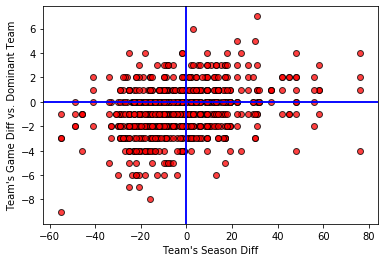

In [33]:
# scatter_x = merge_table["team_season_DIFF"]
# scatter_y = merge_table["ng_DIFF"]
# group = merge_table["league_id"]
# cdict = {0:"red",1:"orange",2:"blue",3:"green",4:"yellow",5:"black",6:"cyan",7:"magenta",8:"brown",9:"lime",10:"pink"}
# fig, ax = plt.subplots()
# for g in np.unique(group):
#     ix = np.where(group == g)
#     ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
# ax.legend()
# plt.show()

plt.xlabel("Team's Season Diff")
plt.ylabel("Team's Next Game Diff")
plt.axhline(0, color='b')
plt.axvline(0, color='b')
plt.scatter(merge_table["team_szn_DIFF"], merge_table["ng_DIFF"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)




plt.xlabel("Team's Season Diff")
plt.ylabel("Team's Game Diff vs. Dominant Team")
plt.axhline(0, color='b')
plt.axvline(0, color='b')
plt.scatter(merge_table["team_szn_DIFF"], merge_table["DIFF"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)


merge_table["dom_team"].unique()
#dom_team has 11 elements and dom_DIFF only has 9 elements

#dom_DIFF = merge_table["dom_season_DIFF"].unique()
#plt.bar(dom_team, dom_DIFF, color='r', alpha=0.5, align="center")
